In [129]:
import math 
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [130]:
# get the stock quote of a corporation (Apple Inc.)
# df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2021-12-17')
df = pd.read_csv('../data_input/AAPL_data.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-06-13,24.780001,24.275000,24.672501,24.334999,152082000.0,22.733387,AAPL
1,2016-06-14,24.620001,24.187500,24.330000,24.365000,127727600.0,22.761415,AAPL
2,2016-06-15,24.602501,24.257500,24.455000,24.285000,117780800.0,22.686680,AAPL
3,2016-06-16,24.437500,24.017500,24.112499,24.387501,125307200.0,22.782436,AAPL
4,2016-06-17,24.162500,23.825001,24.155001,23.832500,244032800.0,22.263964,AAPL
...,...,...,...,...,...,...,...,...
1253,2021-06-04,126.160004,123.849998,124.070000,125.889999,75169300.0,125.889999,AAPL
1254,2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.900002,AAPL
1255,2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998,AAPL
1256,2021-06-09,127.750000,126.519997,127.209999,127.129997,56788000.0,127.129997,AAPL


In [131]:
# get the number of rows and columns in the data set
df.shape

(1258, 8)

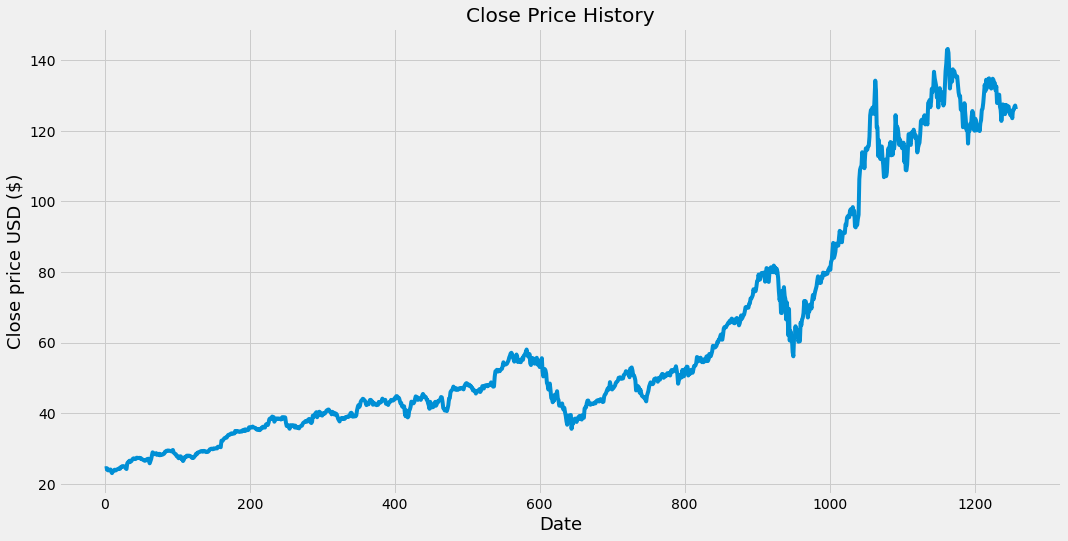

In [132]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [133]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1007

In [134]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.01102787],
       [0.01127757],
       [0.01061173],
       ...,
       [0.86333745],
       [0.86658339],
       [0.85809403]])

In [135]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

5321, 0.39727423, 0.3976904 , 0.38813978,
       0.40717854, 0.41980853, 0.40996671, 0.4184769 , 0.42763211,
       0.43401997, 0.44049102, 0.45378693, 0.46394091, 0.45645026,
       0.44862669, 0.4525593 , 0.44875153, 0.46383684, 0.46004995,
       0.47272161, 0.46776945, 0.47201416, 0.46751977, 0.47039113,
       0.47068246, 0.47003744, 0.47817311, 0.48127338, 0.48497709,
       0.47915106, 0.49825217, 0.50233039, 0.5242405 , 0.54265499])]
[0.03395755145336704, 0.02804826330077978, 0.023075314234289157, 0.027881816776904683, 0.03310444356657194, 0.04105284054049951, 0.048959629852140335, 0.04760715064426388, 0.04481897690393746, 0.04479816513543, 0.04475655747314328, 0.04698294046159418, 0.04300873403726635, 0.04336245472825195, 0.043799406618539205, 0.045588837716702885, 0.041905948427294615, 0.0437161912939657, 0.042613389809265906, 0.04361214832615673, 0.0437161912939657, 0.04546399885511457, 0.04581771954610023, 0.04995838836903119, 0.050478571458619975, 0.05264251914154863, 0.05

In [136]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [137]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(947, 60, 1)

In [138]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [139]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [140]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
model.save('../out/APPL_LSTM_1.h5')

947/947 [==============================] - 49s 44ms/step - loss: 0.0017


In [141]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [142]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [143]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [144]:
# get the models predicted price values
model = load_model('../out/APPL_LSTM_1.h5')
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [145]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.2383498233628

<ipython-input-146-dc49c41f9a97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


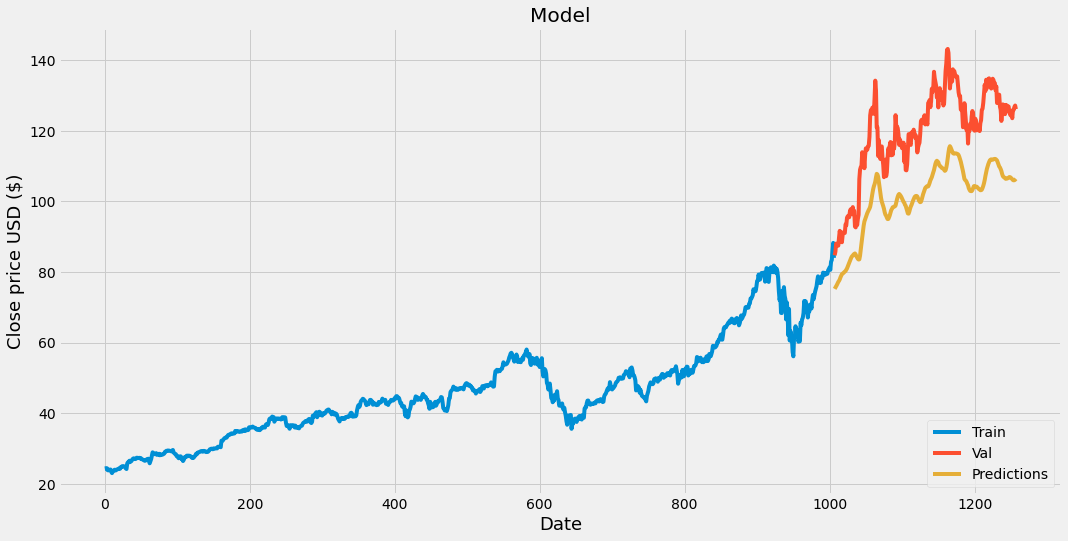

In [146]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [147]:
# show the valid and predicted prices
valid

,Close,Predictions
1007,84.699997,75.188713
1008,85.747498,75.541672
1009,88.019997,75.855217
1010,87.897499,76.306664
1011,87.932503,76.761238
...,...,...
1253,125.889999,106.005371
1254,125.900002,105.944756
1255,126.739998,105.980263
1256,127.129997,106.140121


In [148]:
# ## predict stock price of Apple for 18/12/2019
# # create a new df get teh last 60 days closing price values and convert the df to an array
# last_60_days = data[-60:].values
# # scale the data to be values betweeen 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # create an empty list
# X_test = [] 
# # append teh past 60 days
# X_test.append(last_60_days_scaled)
# # convert the X_test data set to a numpy array
# X_test = np.array(X_test)
# # reshape the data
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# # get the predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [149]:
# # get the quote 18/12/2019
# val = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')
# val['Close']